In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_exp_in = pd.read_csv('life-expectancy-income.csv')
df_lit = pd.read_csv('literacy-rates.csv')

In [3]:
df_exp_in.drop(columns='Unnamed: 3', inplace=True)

In [4]:
df_lit['District'] = df_lit['District'].str.rstrip(' ')
#removing the whitespace

In [5]:
#checking which districts are distinct from two datasets 
set(df_exp_in['District']).difference(df_lit['District'])
set(df_lit['District']).difference(df_exp_in['District'])

{'Chitawan', 'Terhathum'}

In [6]:
#preparing for merging
df_lit['District'] = df_lit['District'].map(lambda x:'Chitwan' if x == 'Chitawan' else x)
df_lit['District'] = df_lit['District'].map(lambda x:'Tehrathum' if x == 'Terhathum' else x)

In [7]:
df_hdi = pd.merge(df_exp_in,df_lit, on='District', how='inner')

In [8]:
df_hdi['Per Capita Income(In USD)'] = df_hdi['Per Capita Income(In USD)'].str.replace(',','')

In [9]:
df_hdi['Per Capita Income(In USD)'] = df_hdi['Per Capita Income(In USD)'] .astype(str).astype(float)

In [10]:
df_hdi.isnull().values.any()
#to check the null value


False

In [11]:
df_hdi

District  Life expectancy(In Years)  Per Capita Income(In USD)  Total  \
0   Ramechhap                      72.90                      951.0   62.2   
1      Gorkha                      71.70                     1039.0   66.3   
2     Saptari                      71.34                      801.0   54.5   
3      Siraha                      71.29                      689.0   50.2   
4    Rautahat                      70.99                      757.0   41.7   
..        ...                        ...                        ...    ...   
70      Humla                      64.15                      794.0   47.8   
71     Bajura                      63.92                      523.0   55.7   
72    Kalikot                      63.64                      578.0   56.8   
73      Jumla                      63.14                     1007.0   54.7   
74      Dolpa                      61.20                     1040.0   54.1   

    Female  Male   Year  
0     53.5  72.6   2013  
1     59.4  75.1   2013  
2     42.6  67.0   2013  
3     39.2  61.9   2013  
4     32.0  50.9   2013  
..     ...   ...    ...  
70    33.0  62.1   2013  
71    43.3  68.8   2013  
72    45.7  67.9   2013  
73    40.8  68.2   2013  
74    40.6  67.9   2013  

[75 rows x 7 columns]

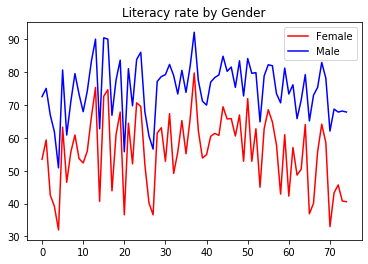

In [12]:
plt.plot(df_hdi['Female'],c='r',label='Female')
plt.plot(df_hdi['Male'],c='b',label='Male')
plt.title('Literacy rate by Gender')
plt.legend()


Text(0.5, 1.0, 'Life expactancy of all districts')

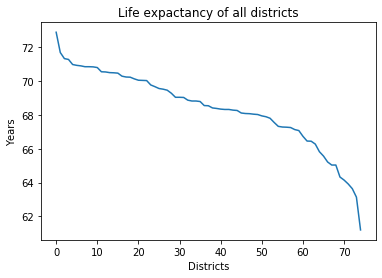

In [13]:
plt.plot(df_hdi['Life expectancy(In Years)'])
plt.xlabel('Districts')
plt.ylabel('Years')
plt.title('Life expactancy of all districts')

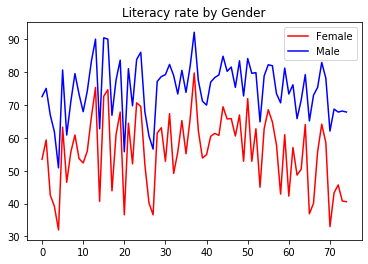

In [14]:
plt.plot(df_hdi['Female'],c='r',label='Female')
plt.plot(df_hdi['Male'],c='b',label='Male')
plt.title('Literacy rate by Gender')
plt.legend()


Text(0.5, 1.0, 'Life expactancy of all districts')

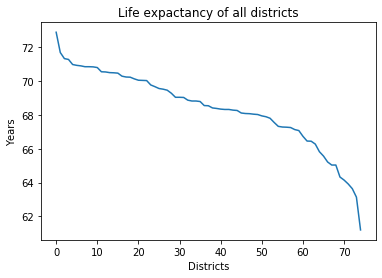

In [15]:
plt.plot(df_hdi['Life expectancy(In Years)'])
plt.xlabel('Districts')
plt.ylabel('Years')
plt.title('Life expactancy of all districts')

In [46]:
df_hdi[df_hdi['Per Capita Income(In USD)'] > 1000]

District  Life expectancy(In Years)  Per Capita Income(In USD)  \
1           Gorkha                      71.70                     1039.0   
5          Lamjung                      70.94                     1186.0   
6           Rasuwa                      70.91                     1520.0   
8   Kavrepalanchok                      70.86                     1399.0   
10         Nuwakot                      70.81                     1086.0   
12          Parbat                      70.55                     1013.0   
13           Kaski                      70.51                     1561.0   
14            Bara                      70.50                     1480.0   
15       Bhaktapur                      70.48                     1379.0   
16        Lalitpur                      70.30                     1894.0   
17           Parsa                      70.25                     1223.0   
18         Khotang                      70.24                     1132.0   
19          Tanahu                      70.14                     1072.0   
21          Myagdi                      70.05                     1028.0   
23         Chitwan                      69.78                     1537.0   
24         Syangja                      69.68                     1215.0   
25   Sindhupalchok                      69.57                     1110.0   
29          Morang                      69.05                     1251.0   
31        Dhankuta                      69.04                     1257.0   
33      Solukhumbu                      68.83                     1841.0   
37       Kathmandu                      68.55                     2764.0   
38   Sankhuwasabha                      68.42                     1193.0   
40           Banke                      68.35                     1133.0   
41         Sunsari                      68.33                     1104.0   
43       Rupandehi                      68.29                     1123.0   
45       Panchthar                      68.12                     1082.0   
47       Makwanpur                      68.08                     1410.0   
48       Tehrathum                      68.05                     1419.0   
50            Ilam                      67.95                     1260.0   
52     Nawalparasi                      67.81                     1157.0   
54            Dang                      67.33                     1127.0   
55           Jhapa                      67.29                     1226.0   
57         Bardiya                      67.26                     1086.0   
64       Taplejung                      65.83                     1313.0   
67         Mustang                      65.04                     1922.0   
68          Manang                      65.04                     3166.0   
73           Jumla                      63.14                     1007.0   
74           Dolpa                      61.20                     1040.0   

    Total  
1    66.3  
5    71.1  
6    53.6  
8    69.8  
10   59.8  
12   73.8  
13   82.4  
14   52.0  
15   81.7  
16   82.5  
17   55.9  
18   68.8  
19   74.8  
21   71.9  
23   77.0  
24   76.6  
25   59.6  
29   70.6  
31   74.4  
33   64.2  
37   86.3  
38   69.4  
40   62.4  
41   68.5  
43   69.8  
45   72.6  
47   67.9  
48   74.6  
50   77.9  
52   70.8  
54   70.3  
55   75.1  
57   65.4  
64   71.3  
67   66.2  
68   74.8  
73   54.7  
74   54.1

In [16]:
df_hdi = df_hdi.drop(columns=[' Year'])

In [17]:
df_hdi.corr().round(3)

Life expectancy(In Years)  \
Life expectancy(In Years)                      1.000   
Per Capita Income(In USD)                      0.071   
Total                                          0.135   
Female                                         0.210   
Male                                           0.047   

                           Per Capita Income(In USD)  Total  Female   Male  
Life expectancy(In Years)                      0.071  0.135   0.210  0.047  
Per Capita Income(In USD)                      1.000  0.506   0.499  0.420  
Total                                          0.506  1.000   0.987  0.971  
Female                                         0.499  0.987   1.000  0.924  
Male                                           0.420  0.971   0.924  1.000

In [18]:
df_hdi['Per Capita Income(In USD)'].idxmax()

68

In [19]:
df_hdi.iloc[68]

District                     Manang
Life expectancy(In Years)     65.04
Per Capita Income(In USD)      3166
Total                          74.8
Female                         64.2
Male                             83
Name: 68, dtype: object

In [20]:
df_hdi['Per Capita Income(In USD)'].idxmin()

66

In [21]:
df_hdi.iloc[66]

District                     Bajhang
Life expectancy(In Years)      65.22
Per Capita Income(In USD)        487
Total                           55.6
Female                          40.1
Male                              73
Name: 66, dtype: object

In [22]:
df_hdi.drop(columns=['Female','Male'], inplace=True)

In [23]:
df_hdi

District  Life expectancy(In Years)  Per Capita Income(In USD)  Total
0   Ramechhap                      72.90                      951.0   62.2
1      Gorkha                      71.70                     1039.0   66.3
2     Saptari                      71.34                      801.0   54.5
3      Siraha                      71.29                      689.0   50.2
4    Rautahat                      70.99                      757.0   41.7
..        ...                        ...                        ...    ...
70      Humla                      64.15                      794.0   47.8
71     Bajura                      63.92                      523.0   55.7
72    Kalikot                      63.64                      578.0   56.8
73      Jumla                      63.14                     1007.0   54.7
74      Dolpa                      61.20                     1040.0   54.1

[75 rows x 4 columns]

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
#to standarize the data
#since, district is not the feature we dropped it
scaler = StandardScaler()
x = df_hdi.drop(columns = ['District'])
scaler.fit(x)
scaled_data = scaler.transform(x)
scaled_data.shape


(75, 3)

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [27]:
clust_k = []
intra_dis = []
sil = []
for k in range(2,6):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(scaled_data)
    clust_k.append(k)
    intra_dis.append(kmeans.inertia_)
    label = kmeans.labels_
    centers = kmeans.cluster_centers_
    a = silhouette_score(scaled_data,label, metric='euclidean')
    sil.append(a)

    
    


Text(0, 0.5, 'Distances')

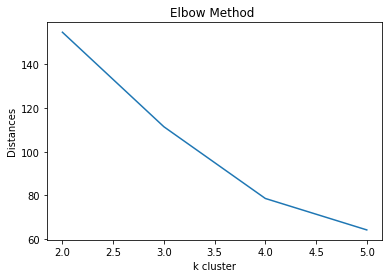

In [28]:
plt.plot(clust_k,intra_dis)
plt.title('Elbow Method ')
plt.xlabel('k cluster')
plt.ylabel('Distances')

Text(0, 0.5, 'Score')

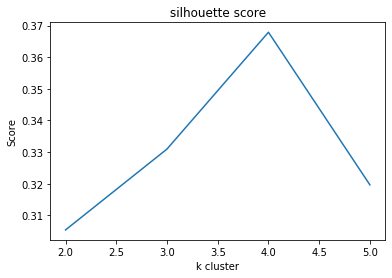

In [29]:
plt.plot(clust_k,sil)
plt.title(' silhouette score ')
plt.xlabel('k cluster')
plt.ylabel('Score')

In [30]:
#kmeans algorithm when k = 4
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(scaled_data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [31]:
from sklearn.decomposition import PCA

In [32]:
#visualize in 2-D
pca_red = PCA(n_components=2)
pca_red.fit(scaled_data)
x_pca = pca_red.transform(scaled_data)




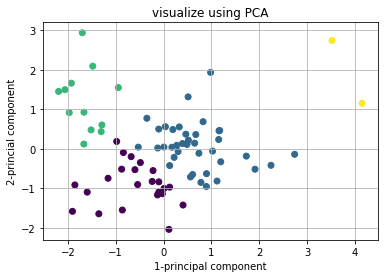

In [33]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels)
plt.title('visualize using PCA')
plt.xlabel('1-principal component')
plt.ylabel('2-princial component')
plt.rcParams['figure.figsize'] = (6,5)
plt.grid()

In [34]:
import plotly.express as px

In [35]:
from sklearn.neighbors import NearestNeighbors

In [36]:
neigh = NearestNeighbors(n_neighbors=9)
neigh.fit(scaled_data)
distances, indices = neigh.kneighbors(scaled_data)
distances.shape
#distances

(75, 9)

Text(0, 0.5, 'epsilon')

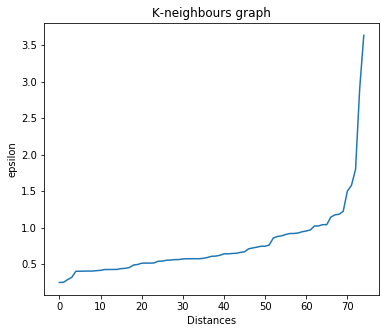

In [37]:
distances = np.sort(distances, axis=0)
distances_toplot = distances[:, 3]
plt.plot(distances_toplot)
plt.title('K-neighbours graph')
plt.xlabel('Distances')
plt.ylabel('epsilon')

In [38]:
from sklearn.cluster import DBSCAN

In [39]:
def dbscan_params(scaled_data,x_pca,param):    
    dbscan = DBSCAN(param['eps'], param['min_sample'])
    dbscan.fit(scaled_data)
    label_dbscan = dbscan.labels_
    print(param['eps'], param['min_sample'])
    plt.scatter(x_pca[:,0],x_pca[:,1],c=label_dbscan)
    plt.title('visualize using PCA')
    plt.xlabel('1-principal component')
    plt.ylabel('2-princial component')
    plt.rcParams['figure.figsize'] = (6,5)
    plt.grid()
    plt.show()

0.1 2


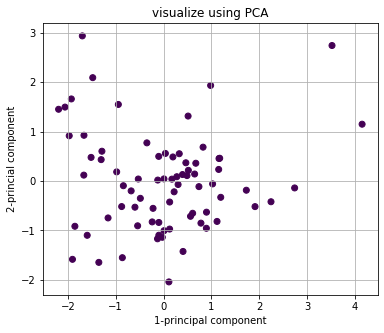

0.1 3


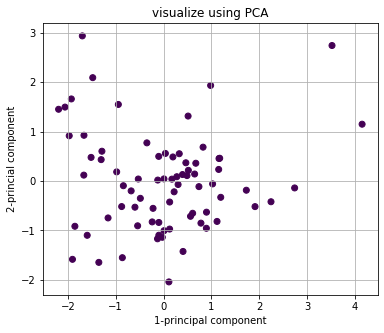

0.1 4


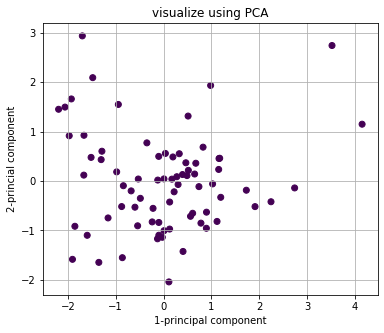

0.1 5


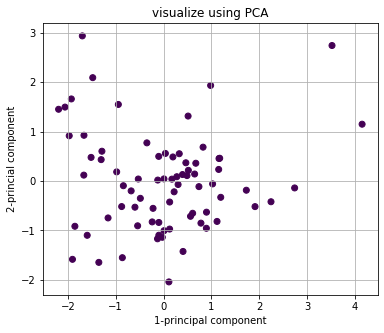

0.1 6


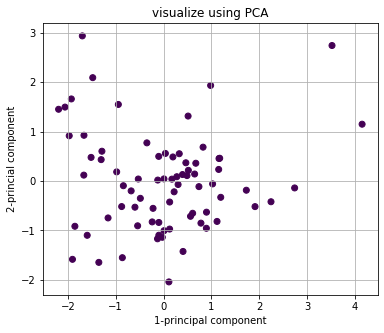

0.1 7


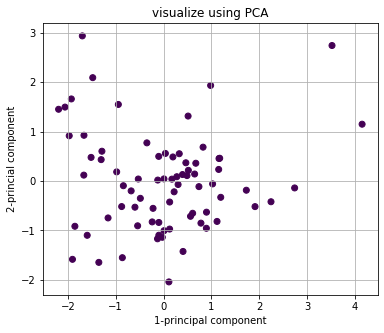

0.1 8


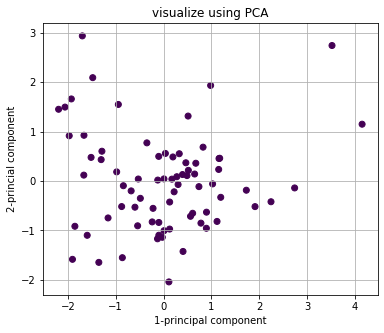

0.2 2


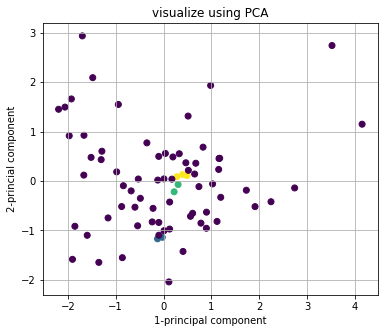

0.2 3


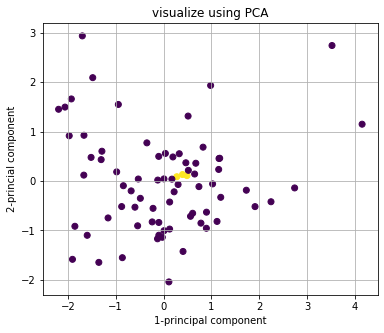

0.2 4


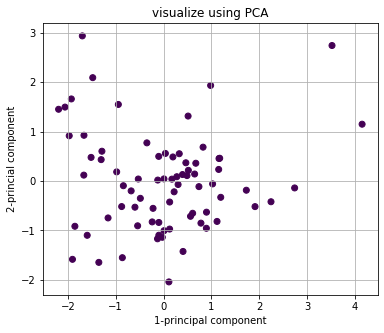

0.2 5


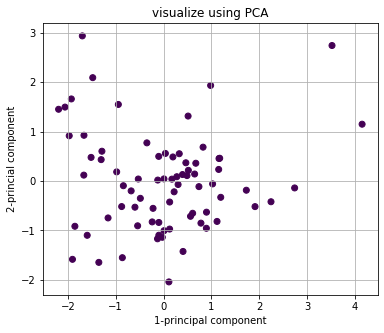

0.2 6


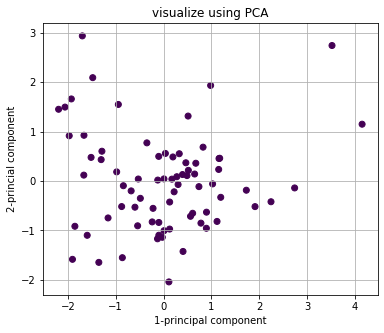

0.2 7


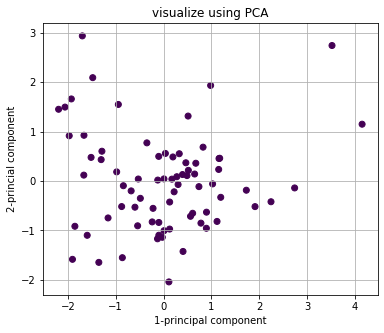

0.2 8


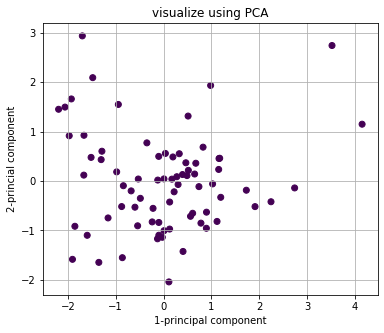

0.3 2


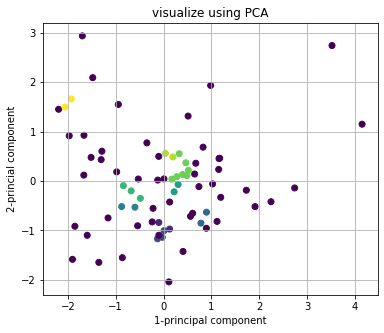

0.3 3


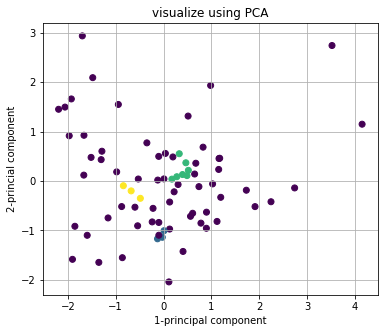

0.3 4


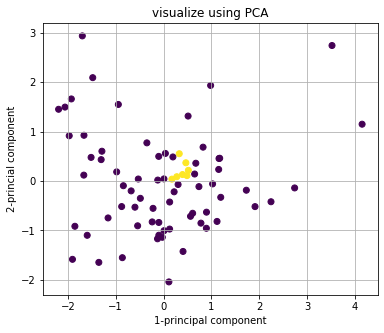

0.3 5


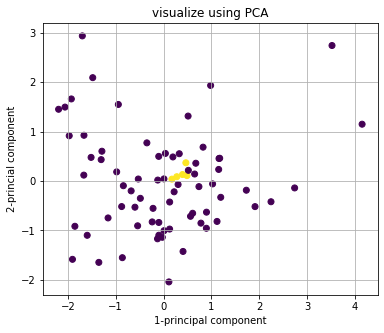

0.3 6


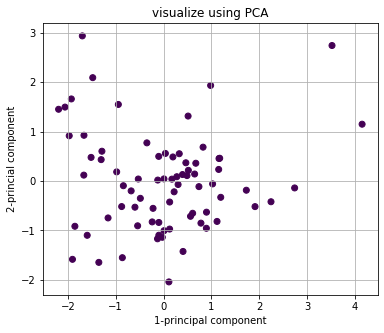

0.3 7


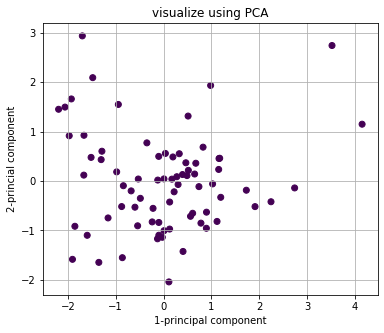

0.3 8


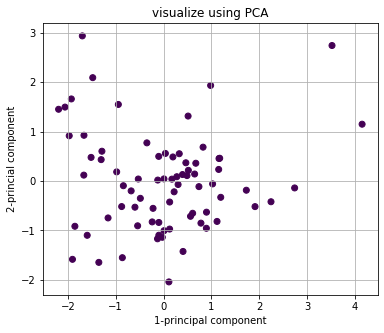

0.4 2


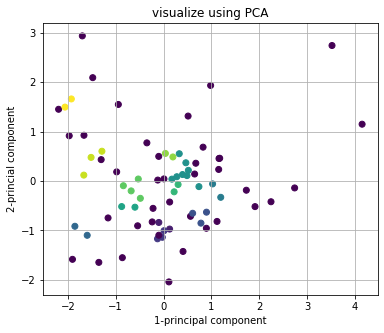

0.4 3


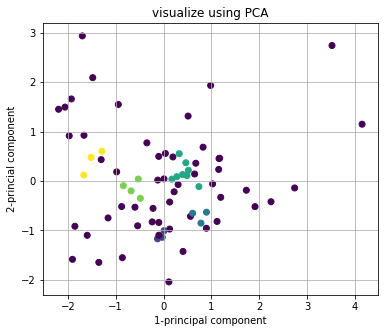

0.4 4


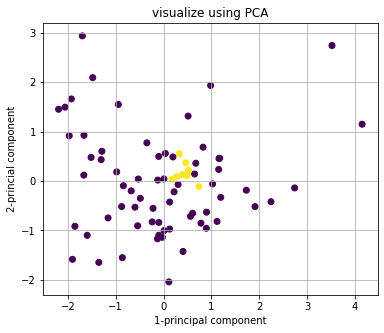

0.4 5


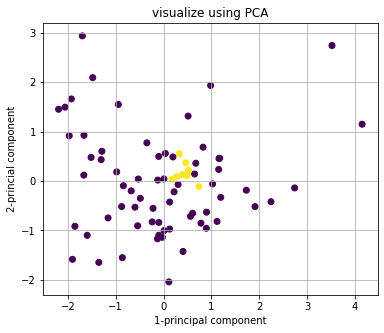

0.4 6


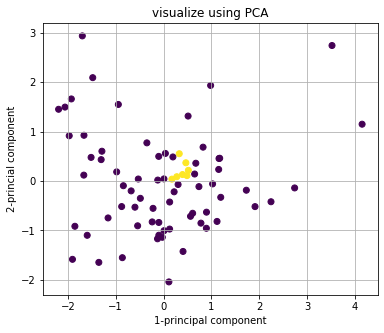

0.4 7


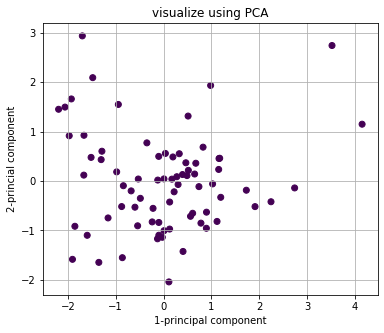

0.4 8


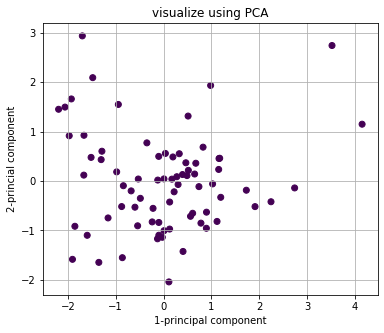

0.5 2


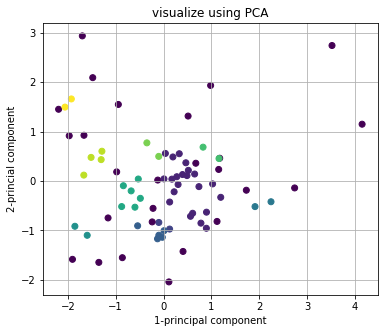

0.5 3


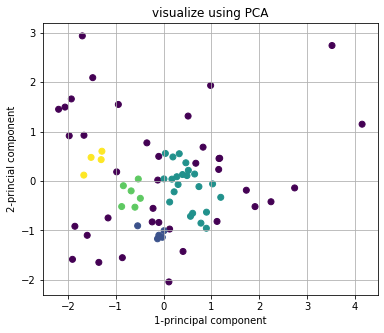

0.5 4


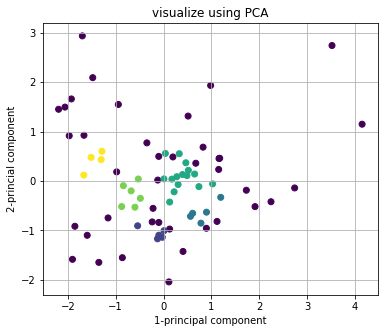

0.5 5


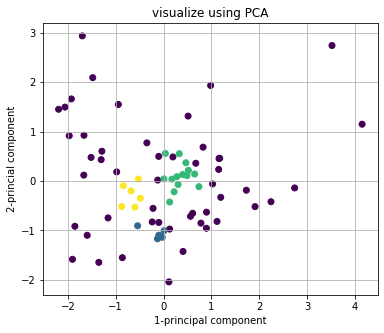

0.5 6


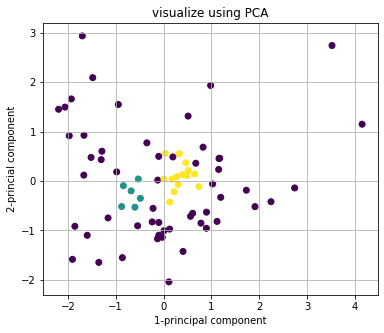

0.5 7


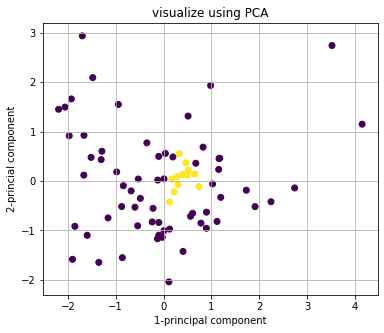

0.5 8


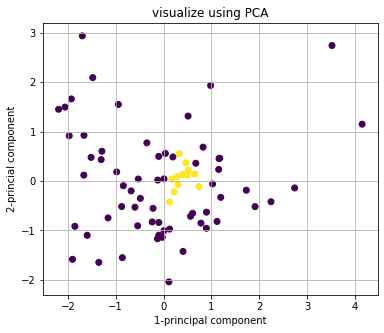

0.6 2


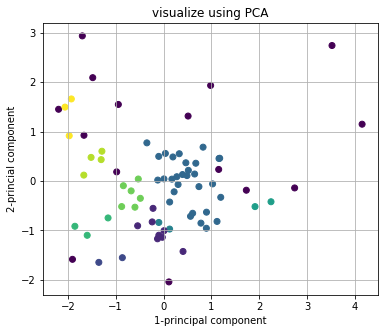

0.6 3


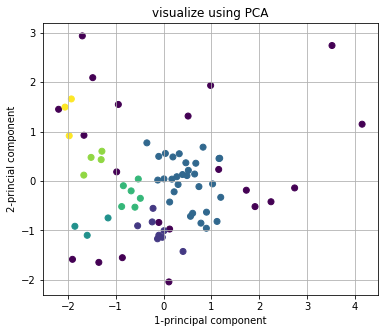

0.6 4


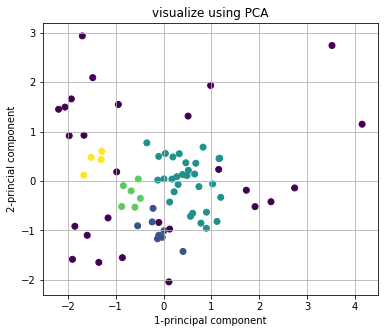

0.6 5


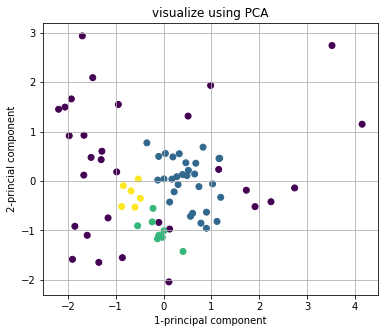

0.6 6


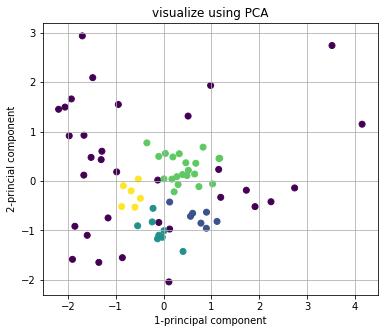

0.6 7


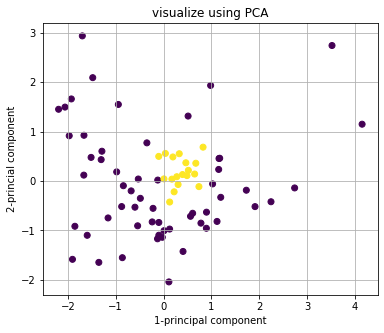

0.6 8


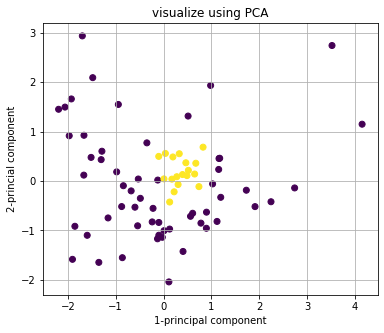

0.7 2


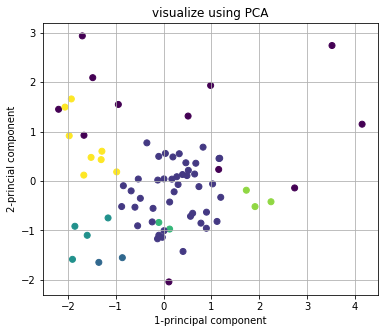

0.7 3


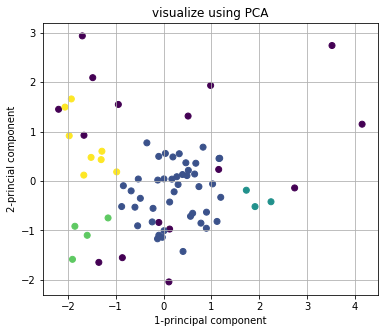

0.7 4


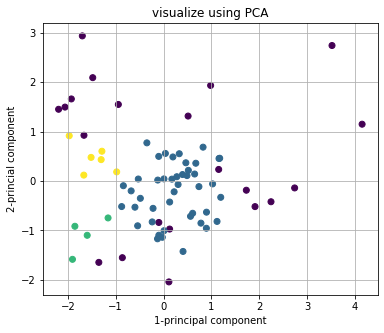

0.7 5


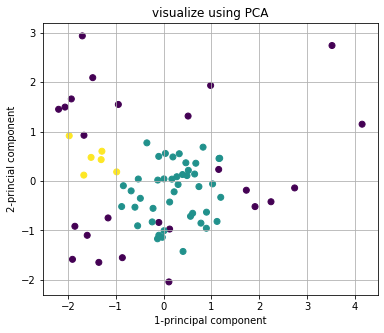

0.7 6


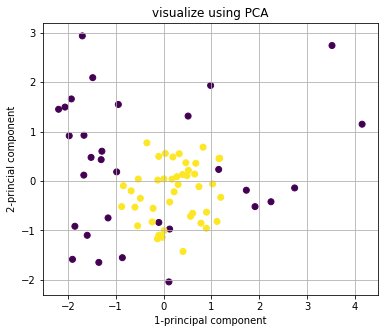

0.7 7


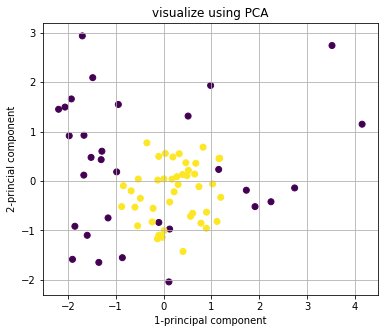

0.7 8


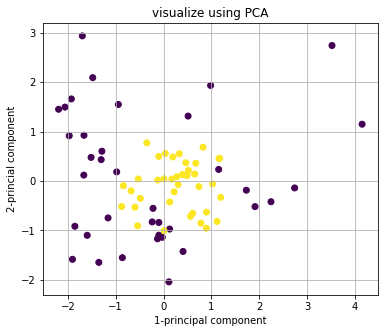

0.8 2


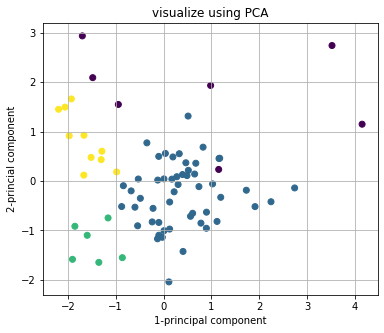

0.8 3


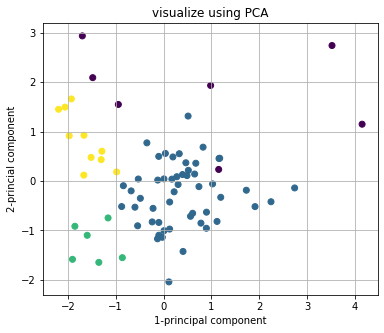

0.8 4


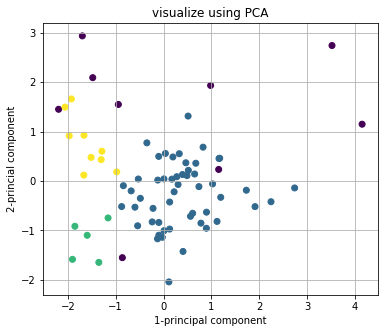

0.8 5


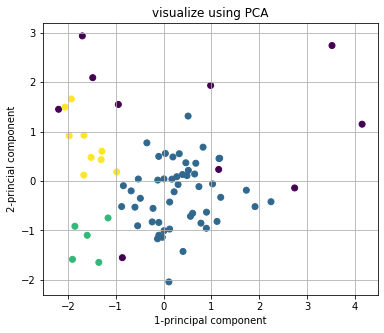

0.8 6


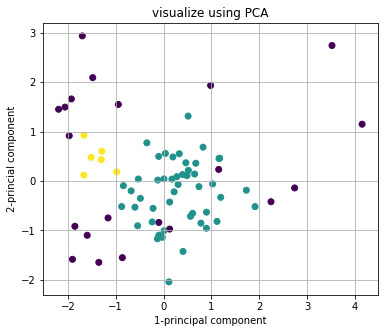

0.8 7


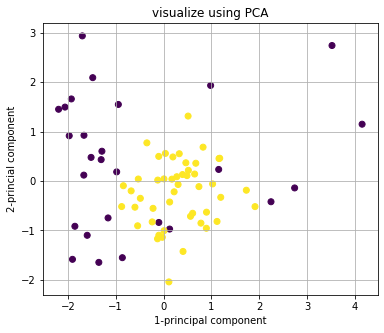

0.8 8


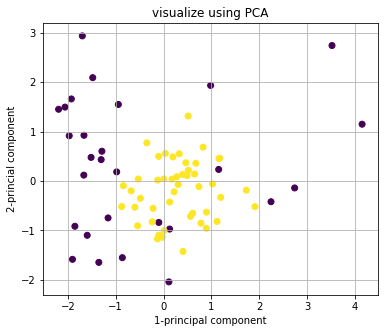

0.9 2


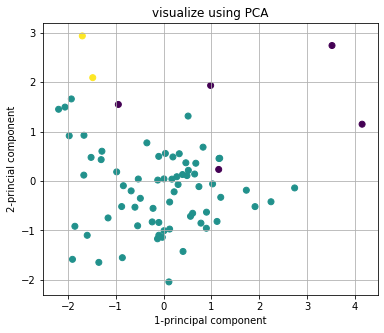

0.9 3


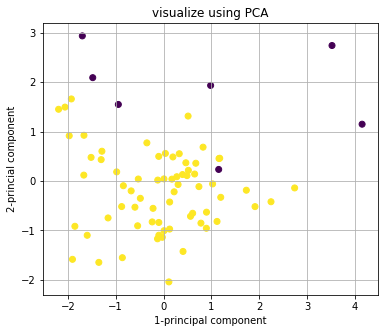

0.9 4


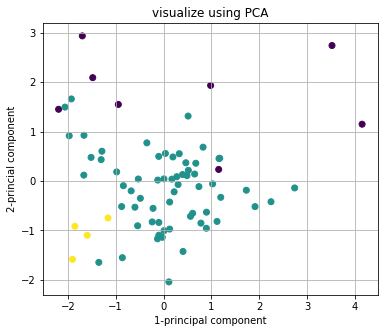

0.9 5


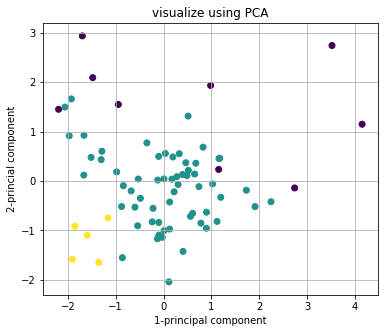

0.9 6


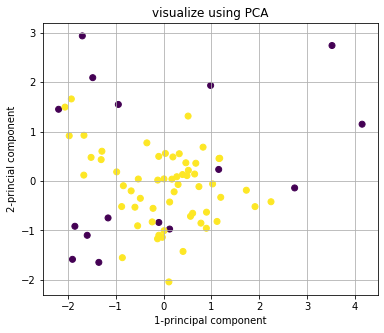

0.9 7


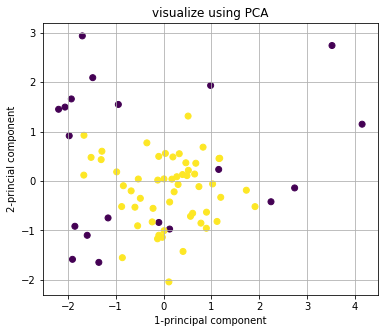

0.9 8


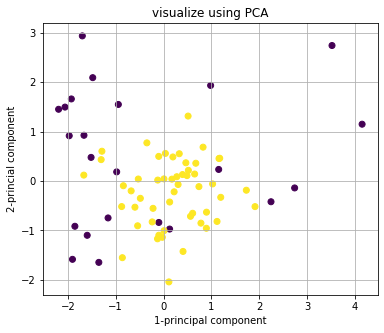

1.0 2


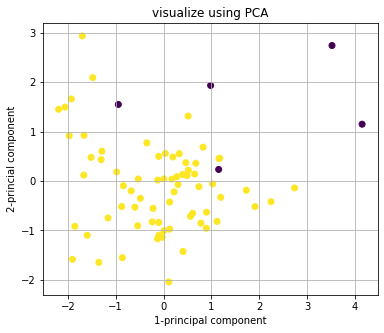

1.0 3


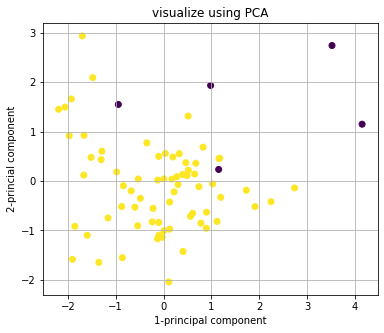

1.0 4


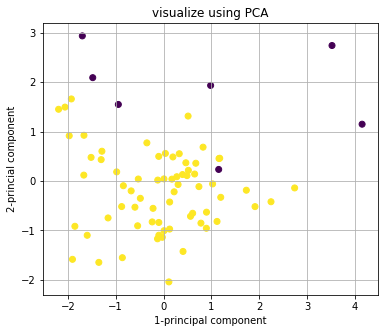

1.0 5


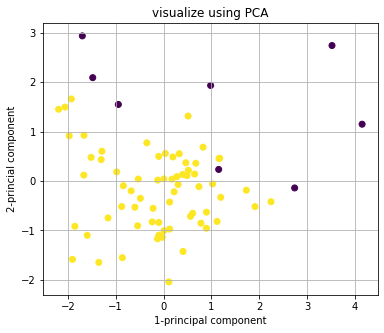

1.0 6


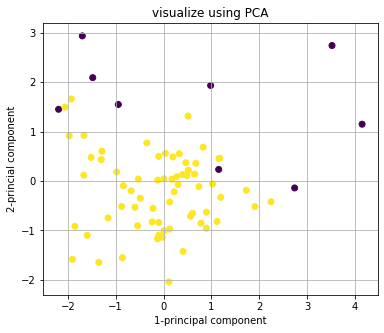

1.0 7


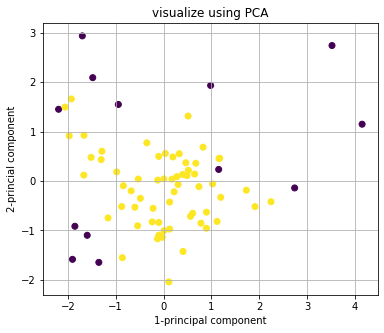

1.0 8


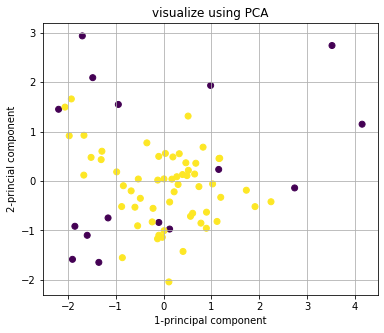

In [40]:
many_samples= {
        'eps' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],#0.4,0.5,0.6],
        'min-sample' : [2,3,4,5,6,7,8]
    }

for i in many_samples['eps']:
    for j in many_samples['min-sample']:
       param = {
           'eps' : i,
           'min_sample' : j
       }
    
       dbscan_params(scaled_data,x_pca,param)
    

In [41]:
dbscan = DBSCAN(eps=0.8, min_samples=4)
dbscan.fit(scaled_data)
label_dbscan = dbscan.labels_

In [42]:
plot_data = pd.DataFrame( x_pca,columns = ['c1','c2'])
plot_data['label'] = dbscan.labels_
plot_data['District'] = df_hdi['District'].tolist()

In [43]:
fig = px.scatter(plot_data, x='c1',y='c2',color='label', hover_data=['District'])
fig.show()